# This notebook is used to create visuals in Geopandas

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import folium
import requests

from shapely.geometry import Point
from cartopy import crs as ccrs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc

%matplotlib inline
pd.options.display.max_rows = 999

import warnings

warnings.filterwarnings("ignore","GeoSeries.isna", UserWarning)

[This resource](https://www.linkedin.com/pulse/geopandas-plotting-data-points-map-using-python-régis-nisengwe/) helped us find the [following site](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.geom_type.html#geopandas.GeoSeries.geom_type) to make Geopandas read the grocery store location information as geometry.

#### Read in data

In [2]:
census = gpd.read_file('./data/census_tract_2010_cook_county/tl_2010_17031_tract10.shp')
grocery = pd.read_csv('./data/Grocery_Store_Status.csv')
food_obesity = pd.read_csv('./data/food_obesity.csv')
food_diabetes = pd.read_csv('./data/food_diabetes.csv')
census.head(3)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,17,031,840300,17031840300,8403,Census Tract 8403,G5020,S,831224,0,+41.8320943,-087.6818822,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
1,17,031,840200,17031840200,8402,Census Tract 8402,G5020,S,831087,0,+41.8445748,-087.6491915,"POLYGON ((-87.64633 41.84009, -87.64632 41.839..."
2,17,031,841100,17031841100,8411,Census Tract 8411,G5020,S,1143247,0,+41.8510058,-087.6350978,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."


In [3]:
grocery.head(3)

,Store Name,Address,Zip,New status,Last updated,Location
0,Jewel - Osco,87 W 87th St,60620,OPEN,06/03/2020 05:00:00 PM,POINT (-87.626243 41.736172)
1,Farm on Ogden,3555 W OGDEN AVE,60623,OPEN,06/10/2020 12:00:00 AM,POINT (-87.71437 41.854608)
2,Jewel - Osco,5343 N Broadway St,60640-2311,OPEN,06/03/2020 05:00:00 PM,POINT (-87.659887 41.978998)


The following section takes the location column from grocery and makes it a geometry column that Geopandas will recognize.

In [4]:
def to_point(item):
    if type(item) == float:
        return np.nan
    else:
        lat_long = item[7:-1].split()
        return Point(float(lat_long[0]), float(lat_long[1]))

grocery['geometry'] = grocery['Location'].apply(to_point)

In [5]:
grocery_geo = gpd.GeoDataFrame(grocery, crs="EPSG:4326")

In [6]:
grocery_geo.dropna(inplace=True)

Create a map of Chicago broken up by census tract and showing the location of local grocery stores.

''

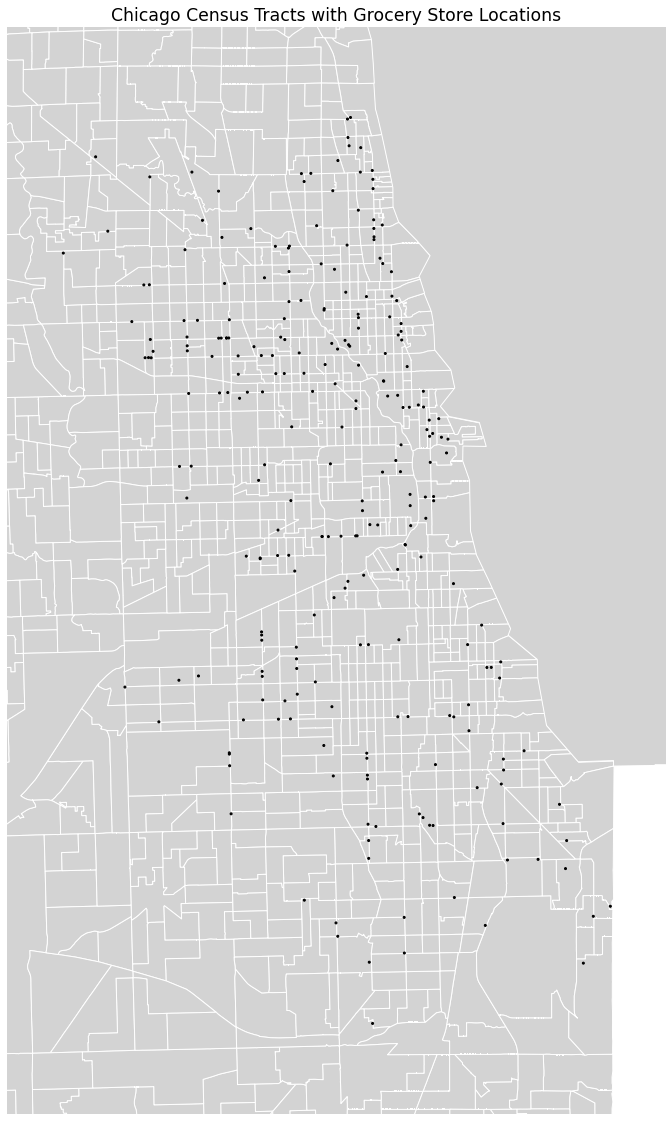

In [54]:
ax = gplt.polyplot(
    census, 
    projection = gcrs.AlbersEqualArea(),
    figsize = (20,20),
    edgecolor = 'white',
    facecolor = 'lightgray')

gplt.pointplot(
    grocery_geo,
    color = 'black',
    ax = ax,
    s = 2,
    )

ax.set_title('Chicago Census Tracts with Grocery Store Locations', fontsize='xx-large')
;

#### Merge the food access with the census tract data

In [8]:
census.drop(columns = ['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10'], inplace = True)

In [9]:
census.rename(columns = {'GEOID10': 'Tract'}, inplace = True)

In [10]:
food_obesity.head()

,Tract,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031010100,4854,2302,0,218.0,4.49,0,1,0,1,...,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,1,33.5
1,17031010201,6450,2463,0,163.0,2.53,0,0,0,0,...,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0,1,33.5
2,17031010202,2818,1115,0,315.0,11.18,0,0,0,0,...,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0,1,33.5
3,17031010300,6236,2826,0,791.0,12.68,0,1,0,1,...,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0,1,33.5
4,17031010400,5042,2098,0,1349.0,26.76,0,0,0,0,...,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0,1,33.5


In [11]:
food_obesity.columns

Index(['Tract', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS',
       'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20',
       'LATractsVehicle_20', 'TractLOWI', 'TractKids', 'TractSeniors',
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP',
       'Community Area', 'HCSOBP_2016-2018'],
      dtype='object')

In [12]:
# convert food_obesity['CensusTract'] to a string so the tables can be merged
food_obesity['Tract']= [str(ct_num) for ct_num in food_obesity['Tract']]
food_diabetes['Tract']= [str(ct_num) for ct_num in food_diabetes['Tract']]

In [13]:
type(food_obesity['Tract'][0])

str

Drop the geometry column and write the data to csv. The latitude and longitude data will be used to calculate the distance of the closest supermarket in an environment that is not limited by geopandas.

In [14]:
# ax = gplt.polyplot(
#     census, 
#     projection = gcrs.AlbersEqualArea(),
#     figsize = (20,20),
#     edgecolor = 'white',
#     facecolor = 'lightgray')

# gplt.pointplot(
#     food_obesity_map,
#     hue = 'Pop2010',
#     ax = ax,
#     cmap = 'Blues',
#     scheme = 'quantiles',
#     scale = 'Pop2010',
#     limits = (2, 20),
#     legend = True,
#     legend_var = 'hue',

# )
# ;

In [15]:
food_obesity_geo = census.merge(food_obesity, on = 'Tract', )
food_obesity_geo.head()

,Tract,geometry,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,1173,0,0.0,0.00,0,1,0,...,104.0,706.0,0.0,46.0,1384.0,2495.0,110.0,256.0,59,20.1
1,17031840200,"POLYGON ((-87.64633 41.84009, -87.64632 41.839...",2338,771,0,3.0,0.13,0,0,0,...,55.0,1359.0,1.0,11.0,261.0,491.0,115.0,150.0,60,21.3
2,17031841200,"POLYGON ((-87.68814 41.85569, -87.68816 41.856...",5262,1639,0,1.0,0.02,0,0,0,...,242.0,17.0,7.0,83.0,2573.0,4501.0,478.0,441.0,31,19.9
3,17031838200,"POLYGON ((-87.66782 41.87418, -87.66768 41.874...",1578,441,0,555.0,35.17,0,1,0,...,219.0,405.0,1.0,8.0,216.0,316.0,157.0,31.0,28,24.1
4,17031650301,"POLYGON ((-87.73706 41.77120, -87.73718 41.771...",5711,1501,0,7.0,0.12,0,0,0,...,79.0,27.0,6.0,57.0,1959.0,4504.0,148.0,233.0,65,28.9


In [16]:
food_diabetes_geo = census.merge(food_diabetes, on = 'Tract', )
food_diabetes_geo.head()

,Tract,geometry,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Label,Community Area,Layer,Name,HCSDIAP_2016-2018,HCSDIAP_2016-2018_moe
0,17031840200,"POLYGON ((-87.64633 41.84009, -87.64632 41.839...",2338,771,0,3.0,0.13,0,0,0,...,261.0,491.0,115.0,150.0,"Census Tract 8402, Cook County, Illinois",60,Community area,Bridgeport,9.8,5.035714
1,17031841200,"POLYGON ((-87.68814 41.85569, -87.68816 41.856...",5262,1639,0,1.0,0.02,0,0,0,...,2573.0,4501.0,478.0,441.0,"Census Tract 8412, Cook County, Illinois",31,Community area,Lower West Side,11.6,6.672321
2,17031838200,"POLYGON ((-87.66782 41.87418, -87.66768 41.874...",1578,441,0,555.0,35.17,0,1,0,...,216.0,316.0,157.0,31.0,"Census Tract 8382, Cook County, Illinois",28,Community area,Near West Side,7.0,3.231250
3,17031650301,"POLYGON ((-87.73706 41.77120, -87.73718 41.771...",5711,1501,0,7.0,0.12,0,0,0,...,1959.0,4504.0,148.0,233.0,"Census Tract 6503.01, Cook County, Illinois",65,Community area,West Lawn,13.0,8.308929
4,17031530503,"POLYGON ((-87.64386 41.66321, -87.64362 41.663...",5345,1784,0,0.0,0.00,1,1,1,...,81.0,57.0,267.0,603.0,"Census Tract 5305.03, Cook County, Illinois",53,Community area,West Pullman,12.5,5.455357


Text(0.5, 1.0, 'Chicago Census Tracts With and Without Low Food Access at a Half-Mile')

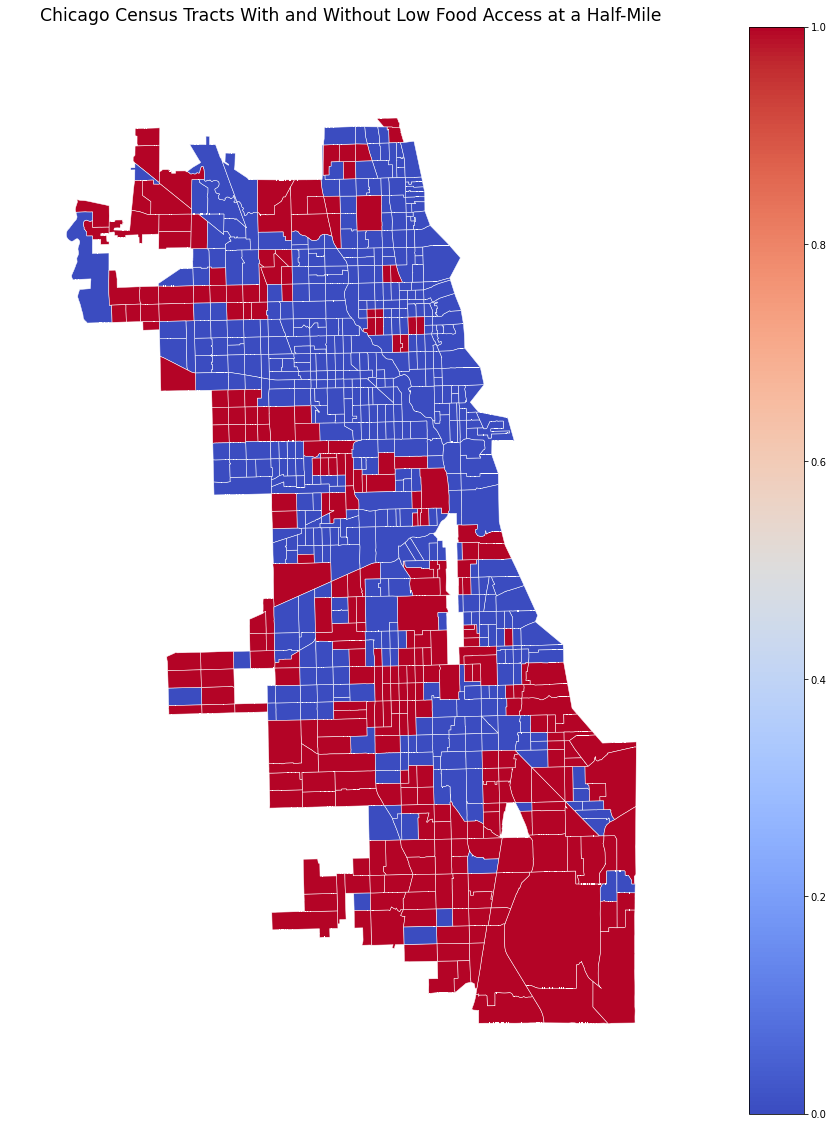

In [53]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'LATracts_half',
    projection = gcrs.AlbersEqualArea(),
    figsize = (20,20),
    legend = True,
    cmap = 'coolwarm', linewidth = 0.5, edgecolor = 'white'
)

ax.set_title('Chicago Census Tracts With and Without Low Food Access at a Half-Mile', fontsize='xx-large')

''

/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


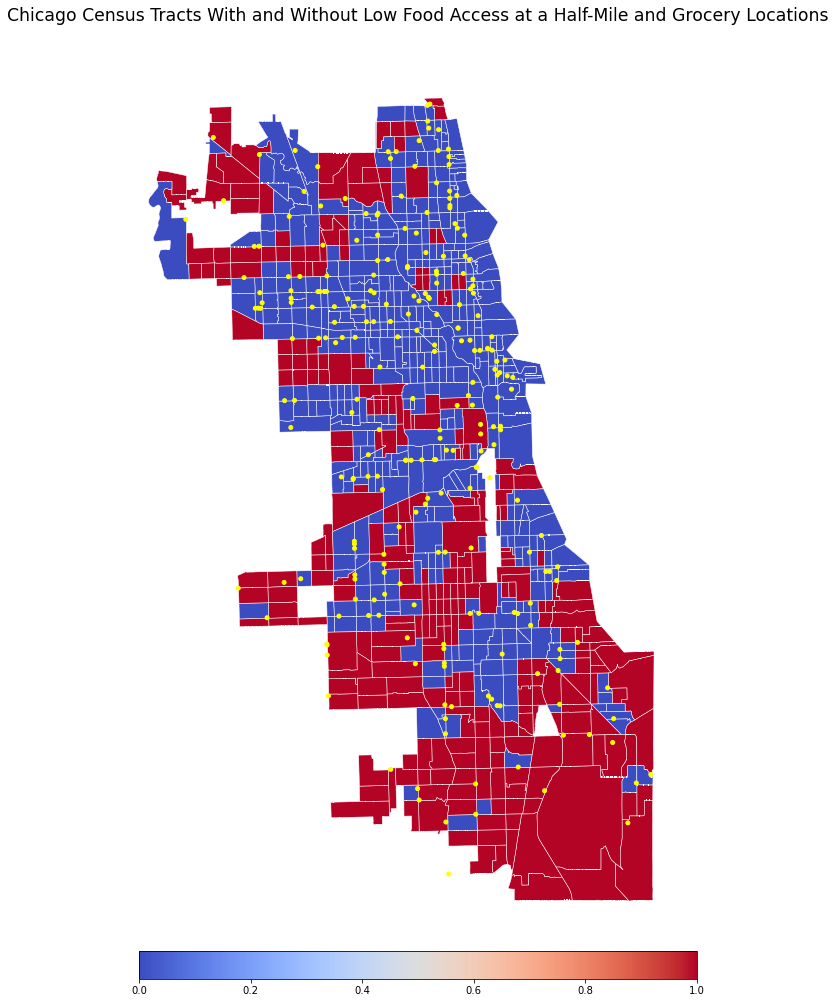

In [88]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'LATracts_half',
    projection = gcrs.AlbersEqualArea(),
    legend=True,
    legend_kwargs={'orientation': 'horizontal', 'shrink': .5, 'pad': 0},
    figsize = (20,20),
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

gplt.pointplot(
    grocery_geo, # includes more data than on food data; need to merge it down.
    color = 'yellow',
    ax = ax,
    s = 4,
    zorder = 2
)

ax.set_title('Chicago Census Tracts With and Without Low Food Access at a Half-Mile and Grocery Locations', fontsize='xx-large')
;

The code below calculates the distance to the grocery store nearest to each census tract. This [resource](https://stackoverflow.com/questions/30740046/calculate-distance-to-nearest-feature-with-geopandas) was very helpful in writing the code.

In [19]:
min_dist = np.empty(len(food_obesity_geo))
for i, point in enumerate(food_obesity_geo['geometry']):
    min_dist[i] = np.min([point.distance(store) for store in grocery_geo['geometry']])
food_obesity_geo['min_dist_to_store'] = min_dist

In [20]:
# One tract is a large outlier and prevents the scale from showing correctly, so it is dropped in the graph below.
farthest_tract = food_obesity_geo[food_obesity_geo['min_dist_to_store'] == np.max(food_obesity_geo['min_dist_to_store'])].index

''

/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/compmarkc/miniforge3/envs/geopandas/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


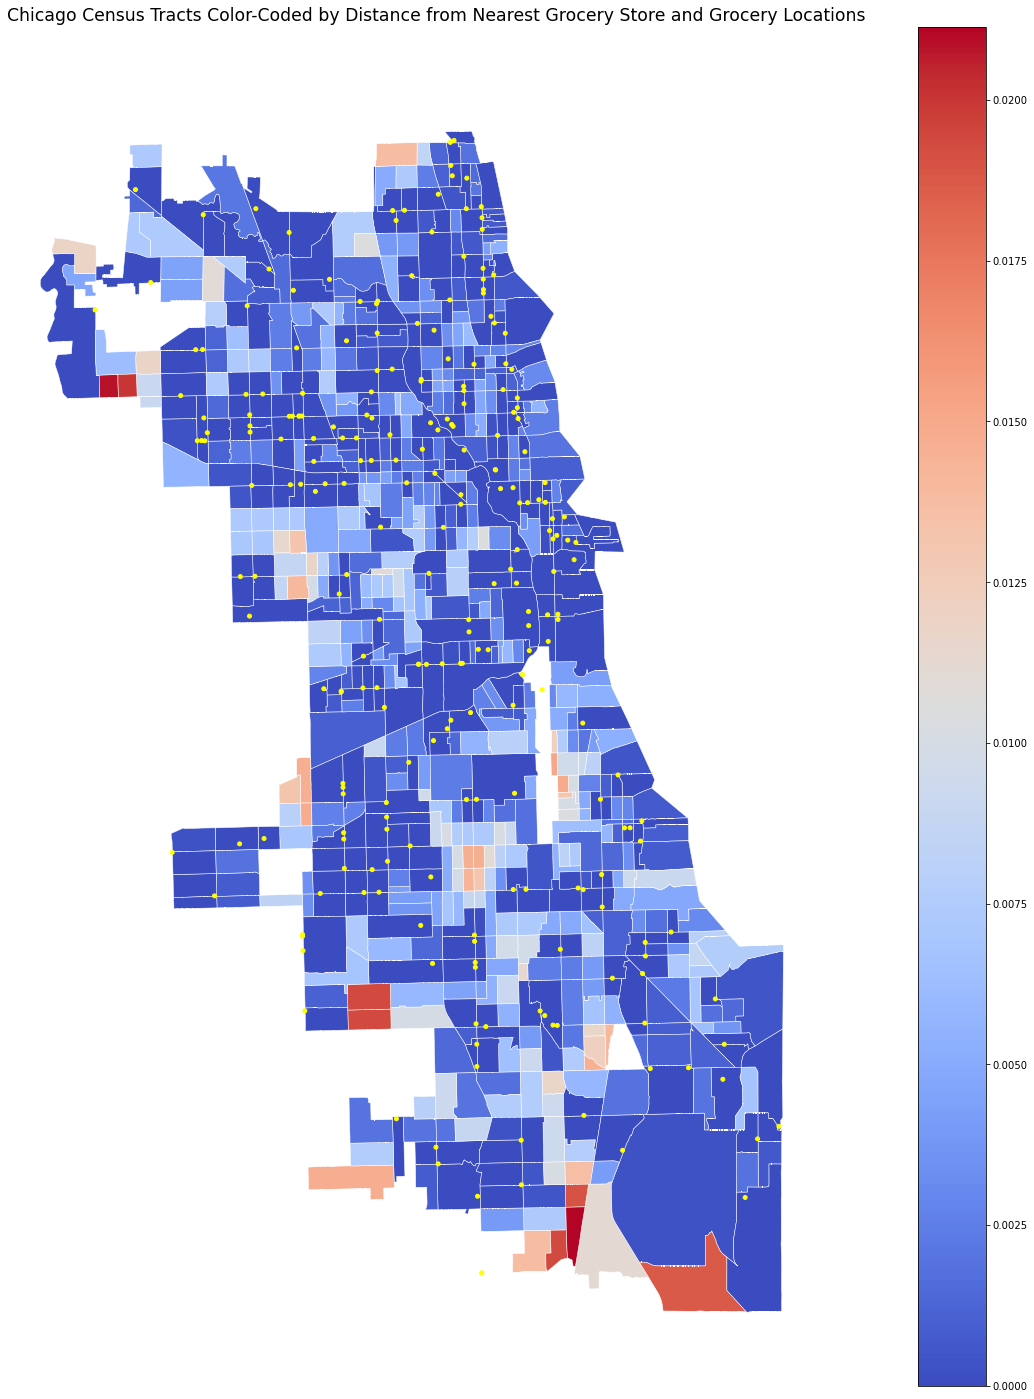

In [37]:
ax = gplt.choropleth(
    food_obesity_geo.drop(farthest_tract),
    hue = 'min_dist_to_store',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

gplt.pointplot(
    grocery_geo, # includes more data than on food data; need to merge it down.
    color = 'yellow',
    ax = ax,
    s = 4,
    zorder = 2,
)

ax.set_title('Chicago Census Tracts Color-Coded by Distance from Nearest Grocery Store and Grocery Locations', fontsize='xx-large')
;

The color coding on this map shows the distance from each census tract to the nearest grocery store.  The black points indicate grocery store locations.  The numerical distance scale on the right is based on latitude and longitude, making it difficult to give an exact conversion to miles.  However, based on the information [here](https://www.usgs.gov/faqs/how-much-distance-does-a-degree-minute-and-second-cover-your-maps?qt-news_science_products=0#qt-news_science_products), we can say that 1 on this scale would correspond to approximately 60 miles.

In [22]:
food_obesity_geo['min_dist_to_store'].describe()

count    784.000000
mean       0.003078
std        0.004120
min        0.000000
25%        0.000000
50%        0.001332
75%        0.004924
max        0.037182
Name: min_dist_to_store, dtype: float64

In [23]:
def categorize_distance(distance):
    if distance == 0:
        return 0
    elif distance < .005:
        return 1
    elif distance < .01:
        return 2
    else:
        return 3
    
food_obesity_geo['dist_cat'] = food_obesity_geo['min_dist_to_store'].apply(categorize_distance)

To improve interpretability of the above graph, we assigned each census tract to a category between 1 and 4. These categories correspond to:
- 1 - Store inside tract
- 2 - Store within approx. 1/3 mile of some point in the tract
- 3 - Store within approx. 2/3 mile of some point in the tract
- 4 - No stores within approx. 2/3 mile of any point in the tract

These distances are again rough approximations.  If necessary, more precise distances could be calculated, but we expect this system to suffice in this case.  Our location accuracy is already limited to the size of each census tract.

In [24]:
food_obesity_geo_nostore = food_obesity_geo[food_obesity_geo['dist_cat']>1]

''

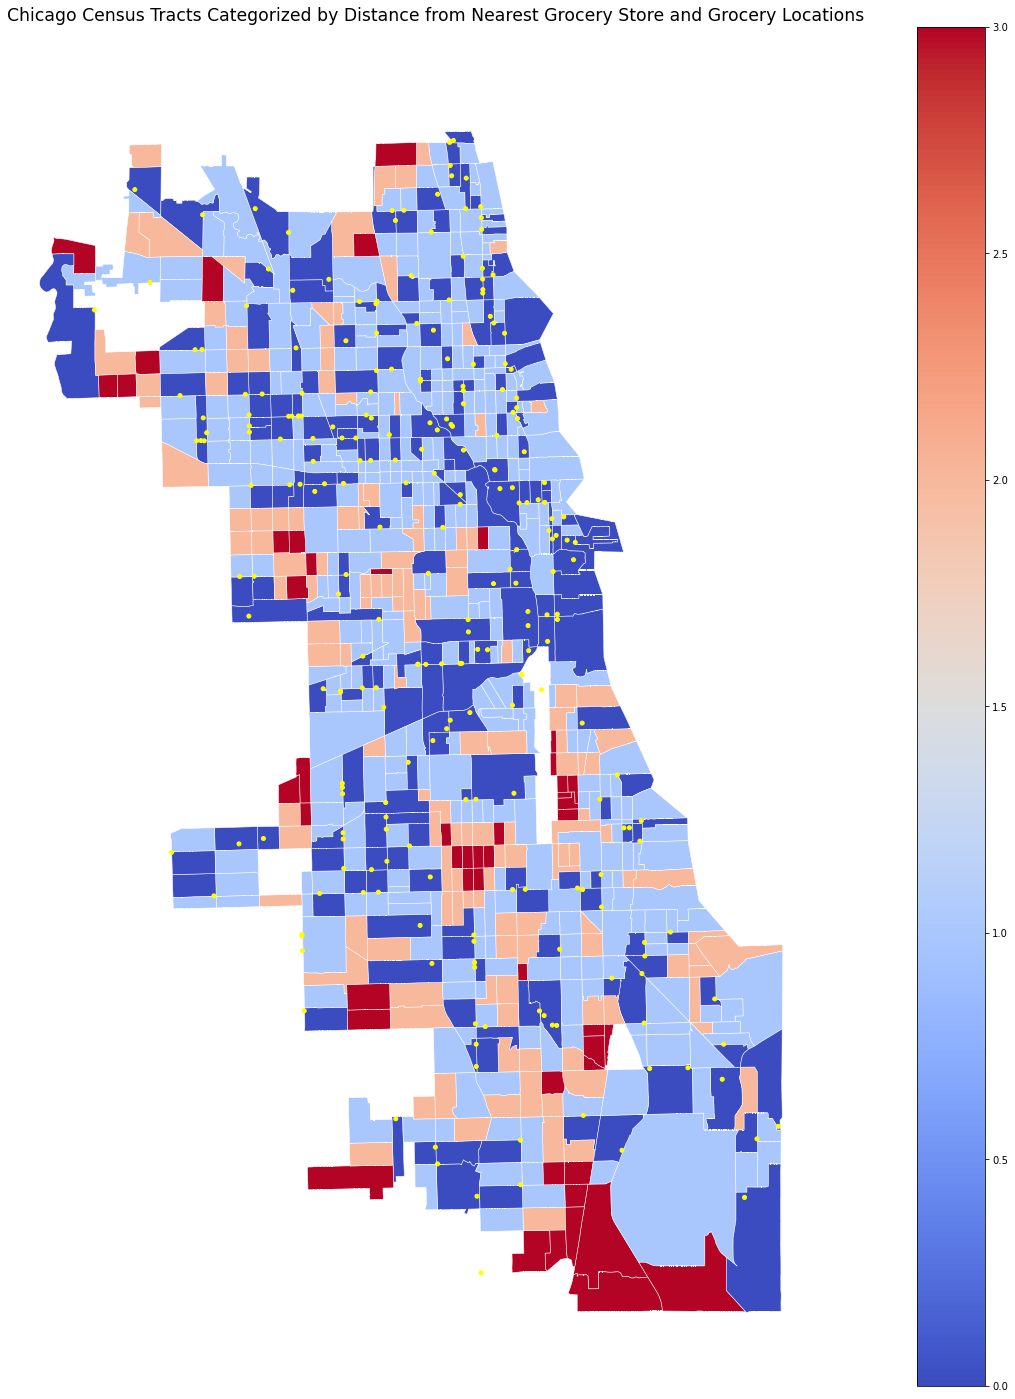

In [38]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'dist_cat',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

gplt.pointplot(
    grocery_geo, # includes more data than on food data; need to merge it down.
    color = 'yellow',
    ax = ax,
    s = 4,
    zorder = 2,
)

ax.set_title('Chicago Census Tracts Categorized by Distance from Nearest Grocery Store and Grocery Locations', fontsize='xx-large')
;

In the graphs below, the code for adding the slashes was borrowed from [here](https://stackoverflow.com/questions/57067623/geopandas-plotting-with-legend-filled-up-with-slash-lines).

''

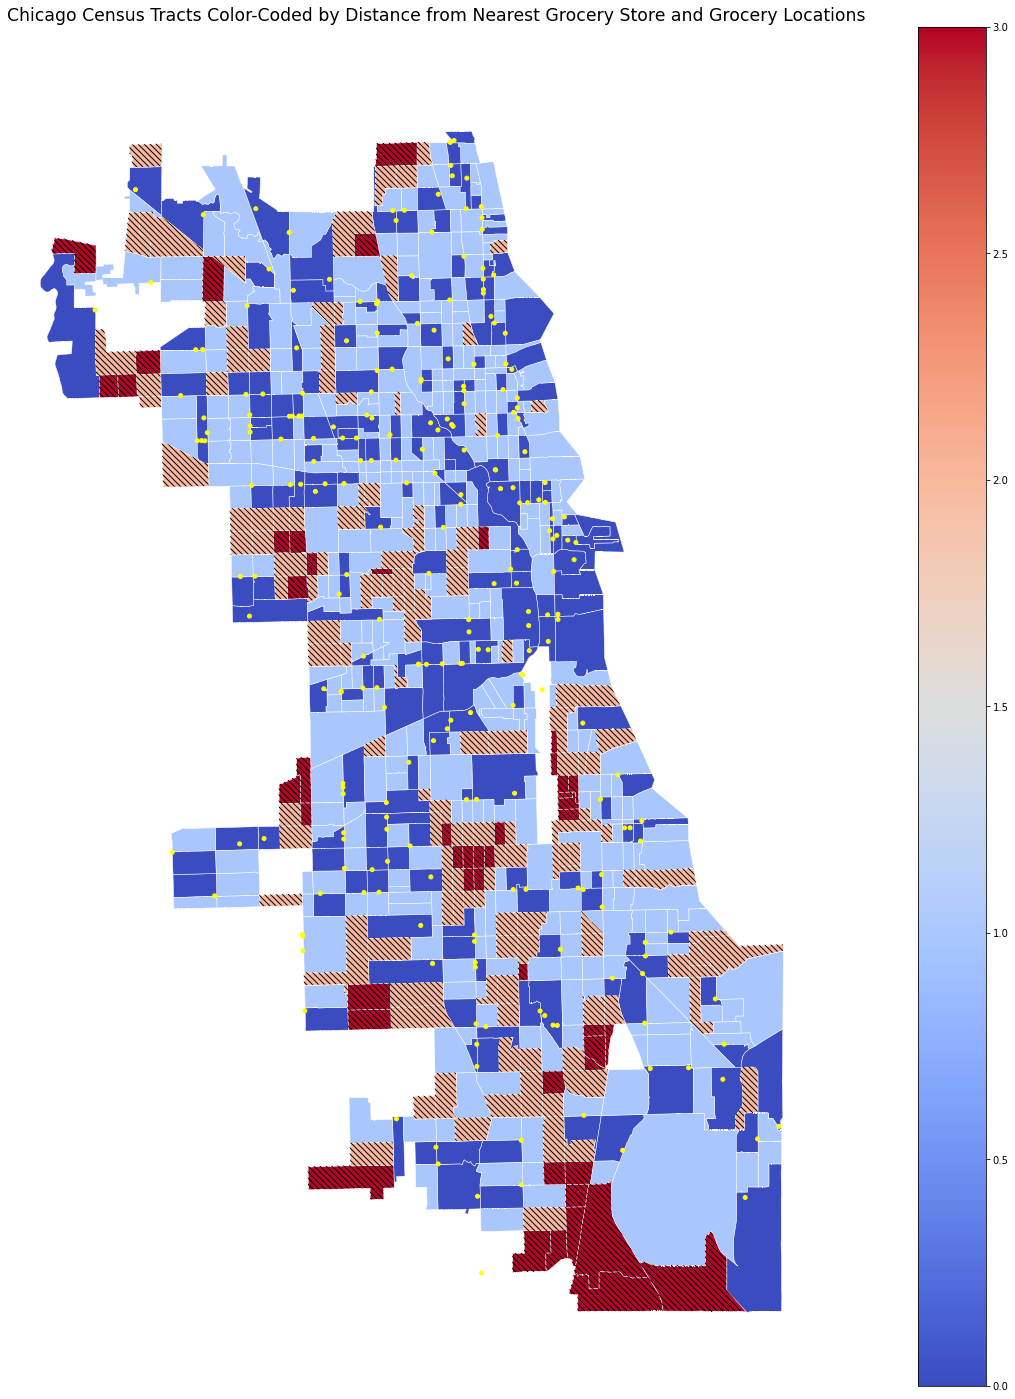

In [39]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'dist_cat',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

ax.add_geometries(food_obesity_geo_nostore['geometry'], crs=ccrs.PlateCarree(), hatch='\\\\\\\\',
                 facecolor='white', alpha=0.01)

gplt.pointplot(
    grocery_geo, # includes more data than on food data; need to merge it down.
    color = 'yellow',
    ax = ax,
    s = 4,
    zorder = 2,
)

ax.set_title('Chicago Census Tracts Color-Coded by Distance from Nearest Grocery Store and Grocery Locations', fontsize='xx-large')
;

''

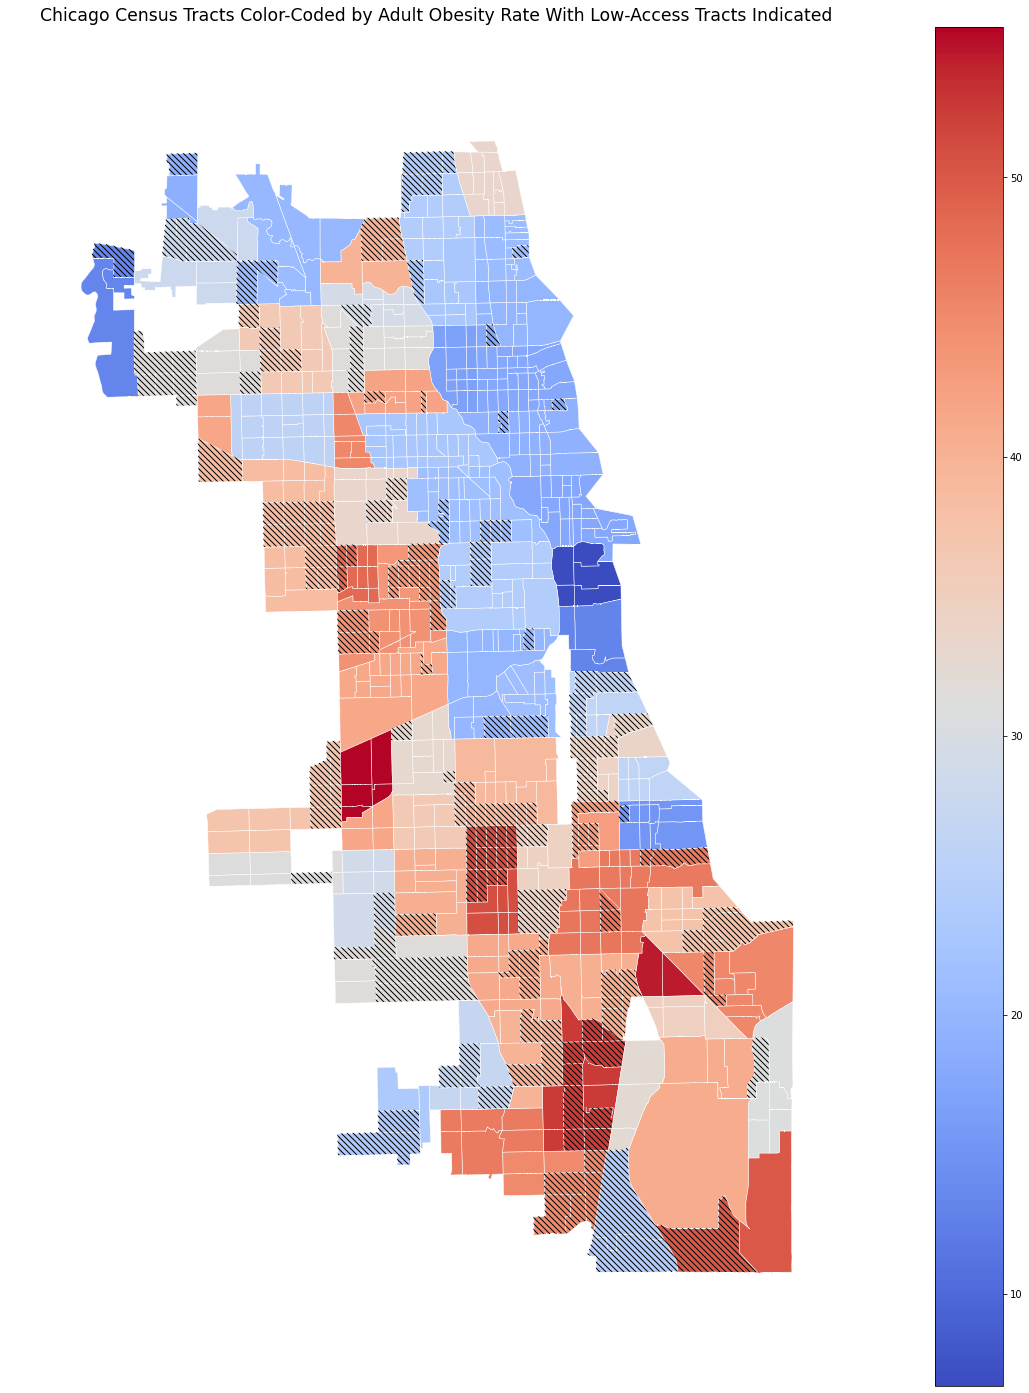

In [40]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'HCSOBP_2016-2018',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

# Code from https://stackoverflow.com/questions/57067623/geopandas-plotting-with-legend-filled-up-with-slash-lines

ax.add_geometries(food_obesity_geo_nostore['geometry'], crs=ccrs.PlateCarree(), hatch='\\\\\\\\',
                 facecolor='white', alpha=0.01)

ax.set_title('Chicago Census Tracts Color-Coded by Adult Obesity Rate With Low-Access Tracts Indicated', fontsize='xx-large')
;

''

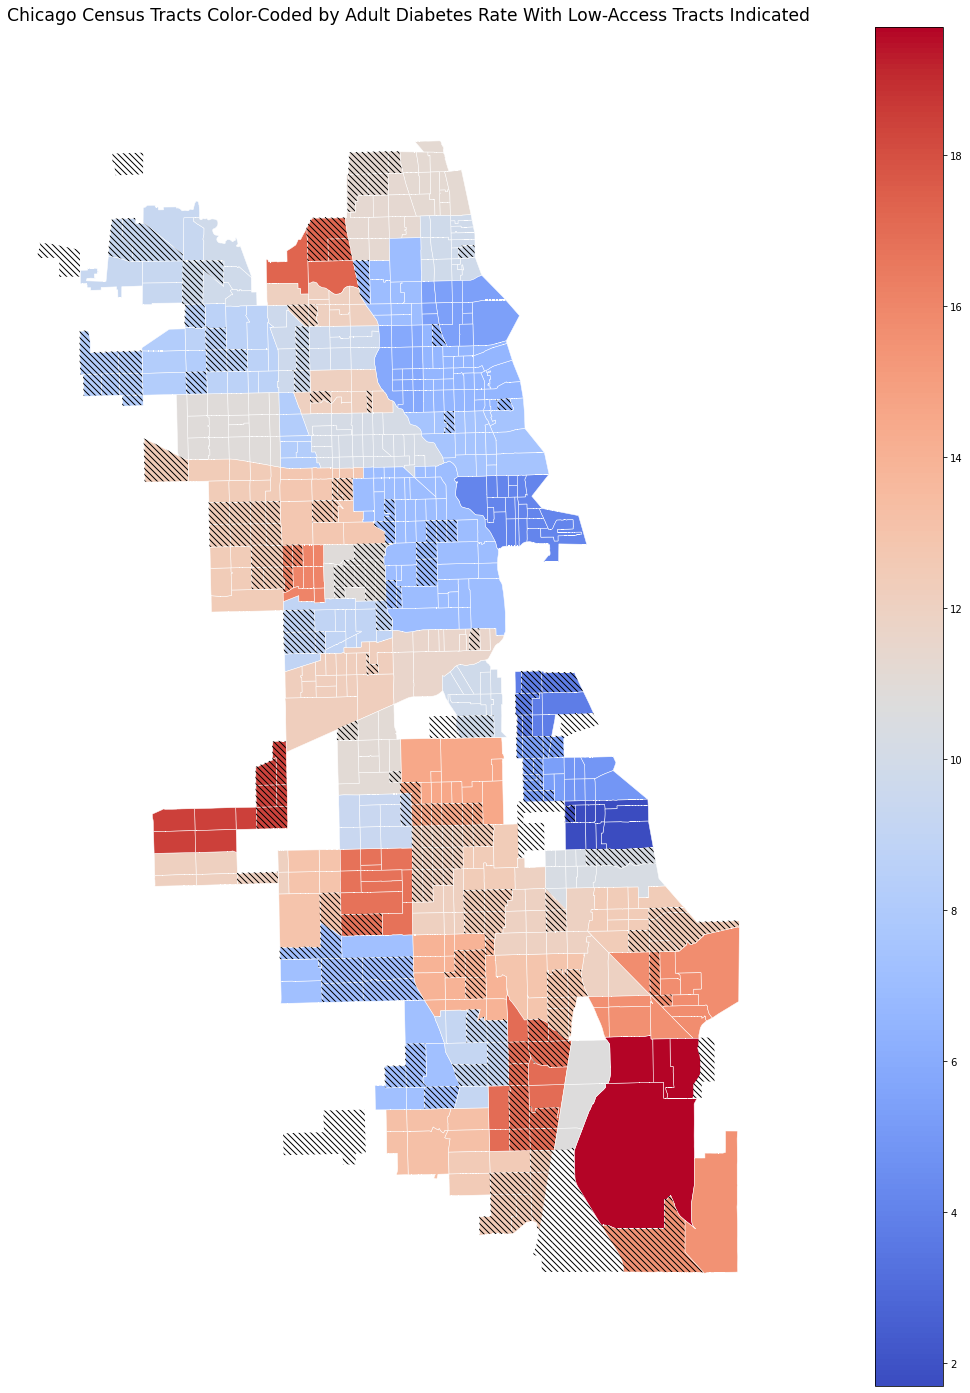

In [41]:
ax = gplt.choropleth(
    food_diabetes_geo,
    hue = 'HCSDIAP_2016-2018',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

ax.add_geometries(food_obesity_geo_nostore['geometry'], crs=ccrs.PlateCarree(), hatch='\\\\\\\\',
                 facecolor='white', alpha=0.01)

ax.set_title('Chicago Census Tracts Color-Coded by Adult Diabetes Rate With Low-Access Tracts Indicated', fontsize='xx-large')
;

''

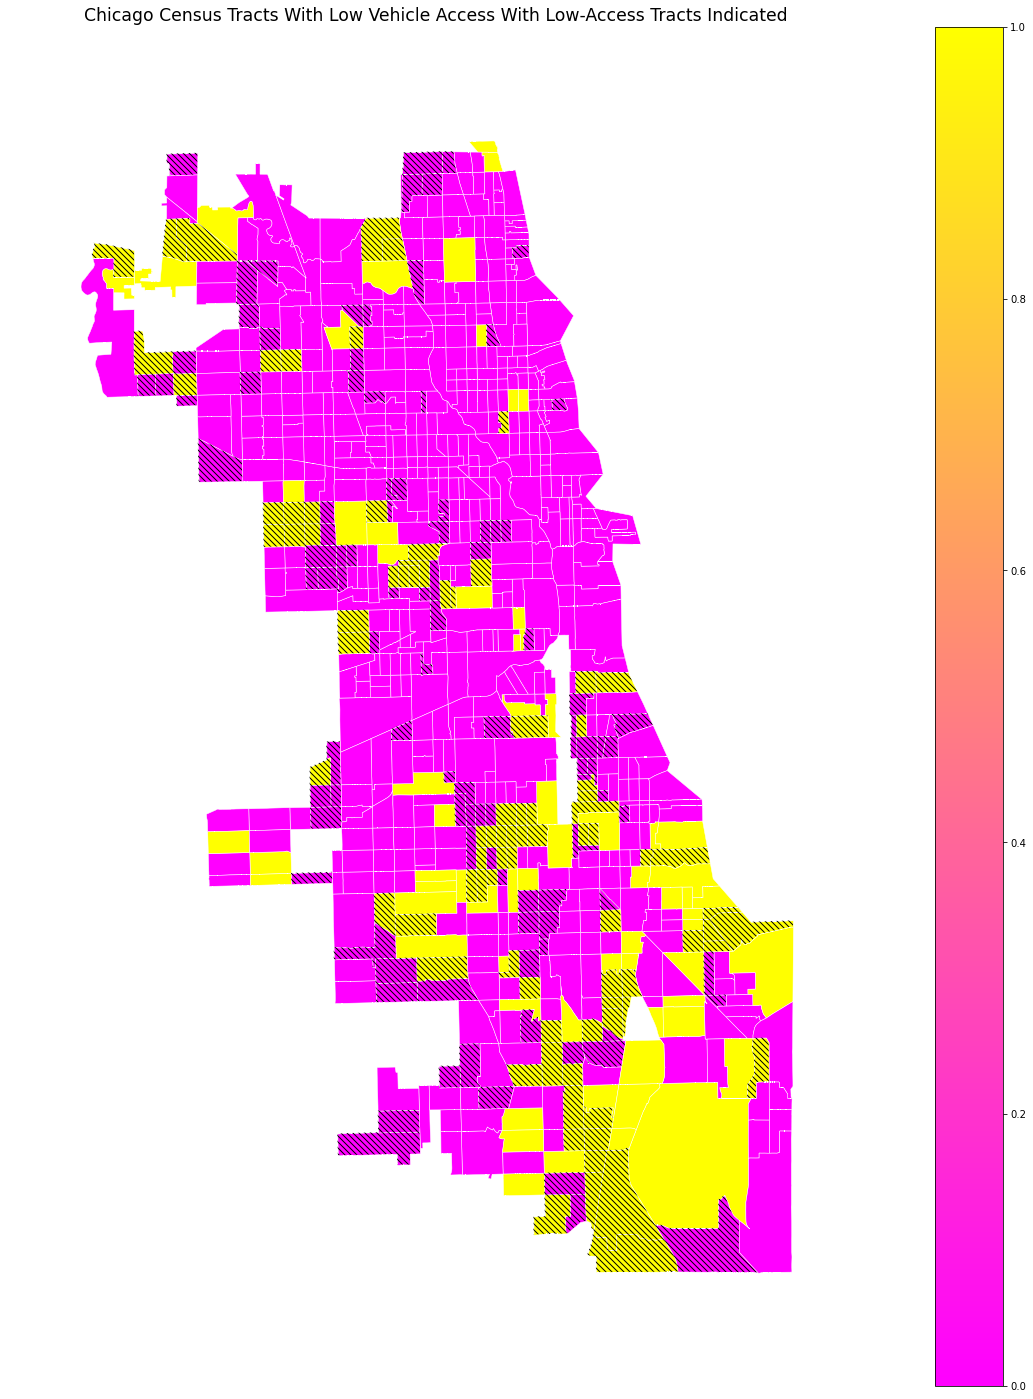

In [47]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'HUNVFlag',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'spring',linewidth = 0.5, edgecolor = 'white'
)

ax.add_geometries(food_obesity_geo_nostore['geometry'], crs=ccrs.PlateCarree(), hatch='\\\\\\\\',
                 facecolor='white', alpha=0.01)

ax.set_title('Chicago Census Tracts With Low Vehicle Access With Low-Access Tracts Indicated', fontsize='xx-large')
;

''

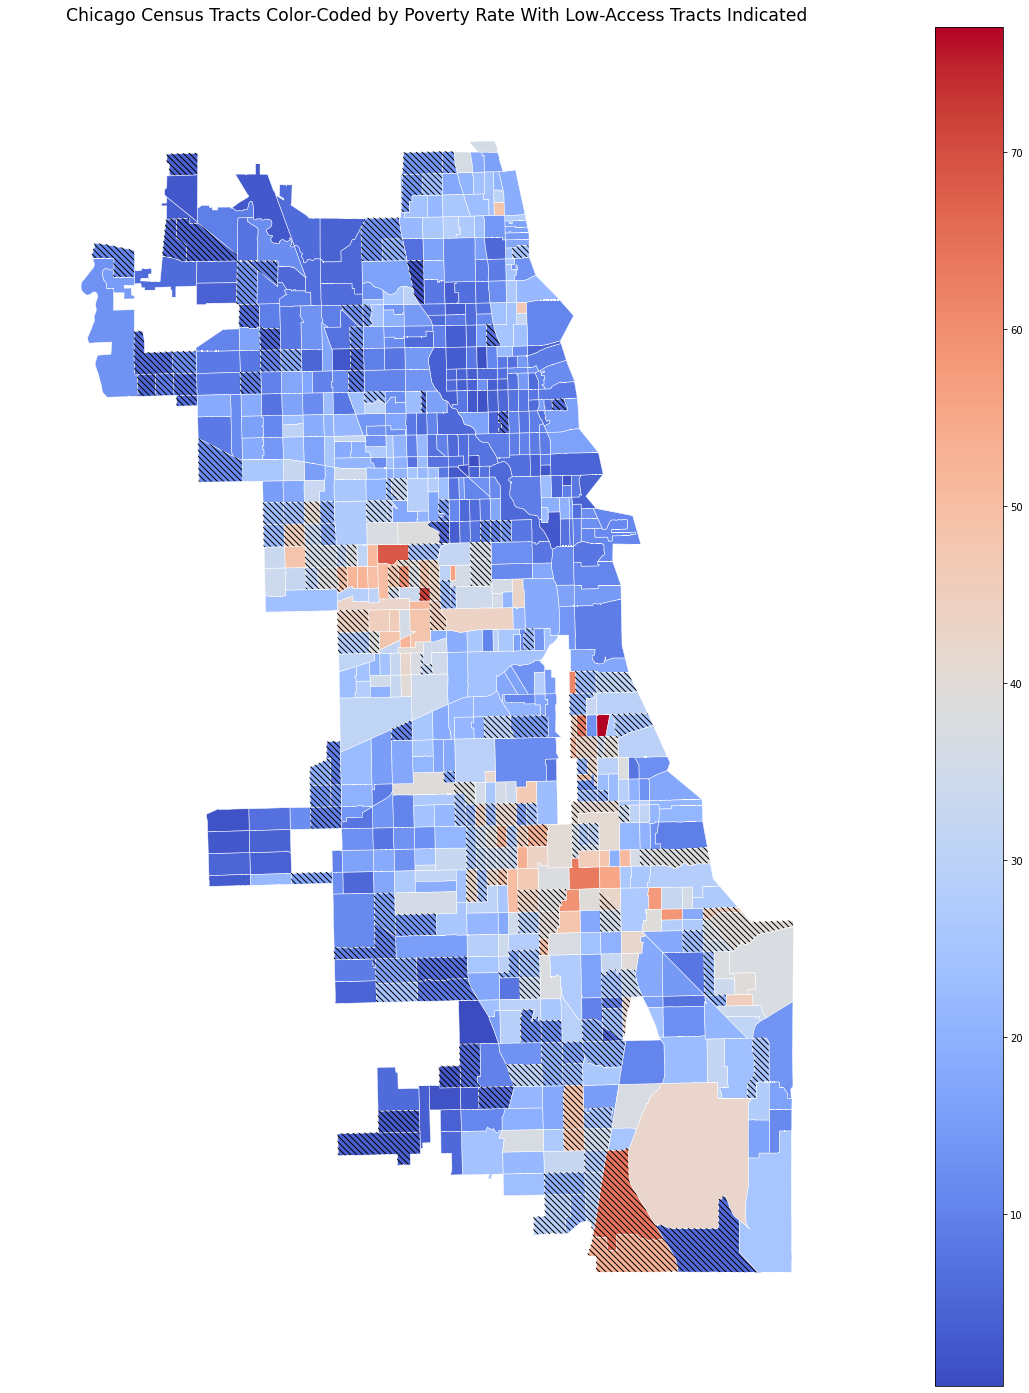

In [45]:
ax = gplt.choropleth(
    food_obesity_geo,
    hue = 'PovertyRate',
    projection = gcrs.AlbersEqualArea(),
    figsize = (25,25),
    legend = True,
    cmap = 'coolwarm',linewidth = 0.5, edgecolor = 'white'
)

ax.add_geometries(food_obesity_geo_nostore['geometry'], crs=ccrs.PlateCarree(), hatch='\\\\\\\\',
                 facecolor='white', alpha=0.01)

ax.set_title('Chicago Census Tracts Color-Coded by Poverty Rate With Low-Access Tracts Indicated', fontsize='xx-large')
;